<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/machine_learning/decision_trees/iris_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drzewo decyzyjne - Iris Dataset

### Import bibliotek

In [0]:
import numpy as np
import pandas as pd
# sklearn jest skrótem od nazwy biblioteki scikit-learn
from sklearn.datasets import load_iris
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Załadowanie danych

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [26]:
data = iris.data
targets = iris.target
# zamiana spacji na _ w nazwach atrybutów "sepal legth", "sepal width" etc.
# i wyrzucenie pięciu ostatnich znaków z każdej nazwy, czyli " (cm)"
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print('Liczba prócek:', len(data))
print('Kształt danych:', data.shape)
print('Nazwy atrybutów:', feature_names)
print('Nazwy kategorii kosaćca: ', class_names)

Liczba prócek: 150
Kształt danych: (150, 4)
Nazwy atrybutów: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca:  ['setosa' 'versicolor' 'virginica']


### Iris Setosa

In [13]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=300)

### Iris Versicolor

In [11]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=300)

### Iris Virginica

In [14]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=300)

In [27]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null float64
dtypes: float64(5)
memory usage: 6.0 KB


In [31]:
# wyświetlenie danych do dwóch miejsc po przecinku
df.describe().apply(lambda x: round(x, 2))

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


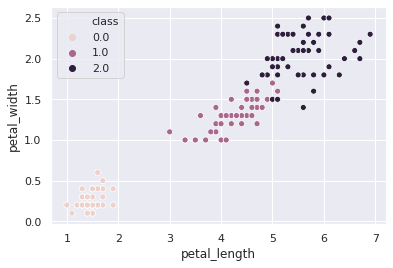

In [32]:
sns.scatterplot('petal_length', 'petal_width', data=df, hue='class', legend='full')

### Przygotowanie danych do modelu

In [33]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

In [39]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [40]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

### DataFrame -> Numpy Array

In [41]:
X = X.values
y = y.values.astype('int16')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int16)

### Drzewa decyzyjne - Klasyfikator

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

### Wykreślenie granic decyzyjnych

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=2')

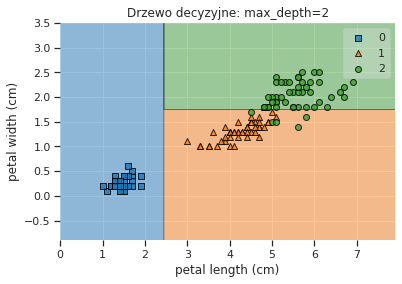

In [52]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, tree_clf)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=2')

In [51]:
tree_clf.score(X, y)

0.96

### Graf drzewa decyzyjnego

In [0]:
from sklearn.tree import export_graphviz

In [0]:
export_graphviz(tree_clf, 
               out_file='iris_tree.dot',
               feature_names=feature_names[2:],
               class_names=class_names,
               rounded=True,
               filled=True)

In [0]:
# konwersja drzewa na plik graficzny .png
%%bash
dot -Tpng iris_tree.dot -o iris_tree.png

### Pythonowy sposób

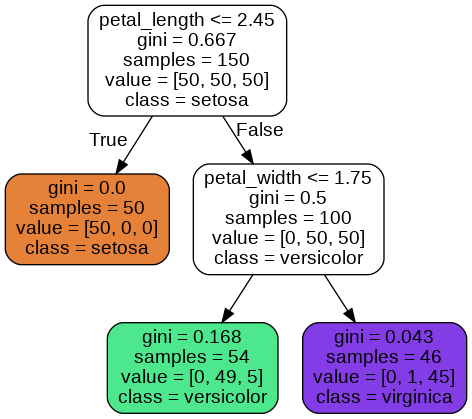

In [57]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, 
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               rounded=True,
               filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

### Automatyzacja budowy modelu

In [0]:
def make_decision_tree(max_depth=1):
  tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=2)
  tree_clf.fit(X, y)

  dot_data = StringIO()
  export_graphviz(tree_clf, 
                  out_file=dot_data,
                  feature_names=feature_names[2:],
                  class_names=class_names,
                  rounded=True,
                  filled=True)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  plot_decision_regions(X, y, tree_clf)
  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title(f'Drzewo decyzyjne: max_depth={max_depth}')

  print('Dokładność modelu:', str(round(tree_clf.score(X, y) * 100, 2)) + '%')
  return Image(graph.create_png())

Dokładność modelu: 66.67%


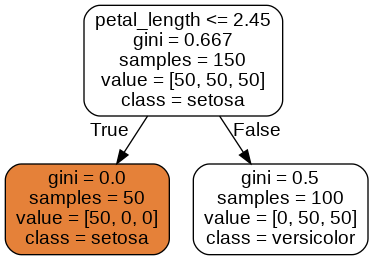

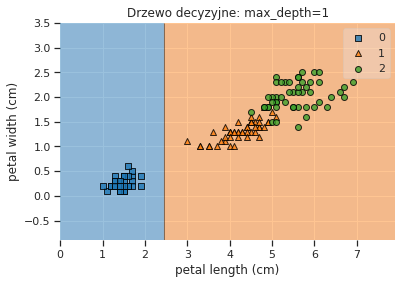

In [77]:
make_decision_tree()

Dokładność modelu: 96.0%


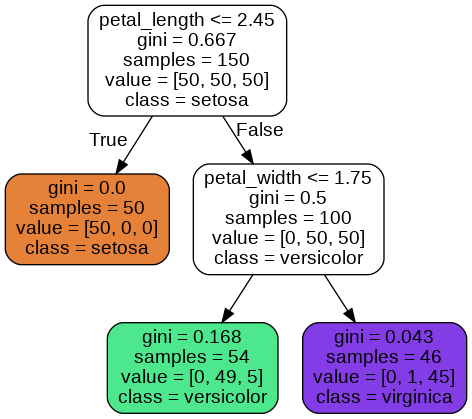

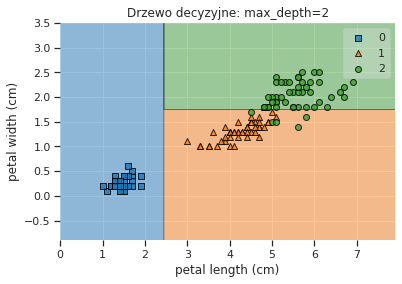

In [78]:
make_decision_tree(max_depth=2)

Dokładność modelu: 97.33%


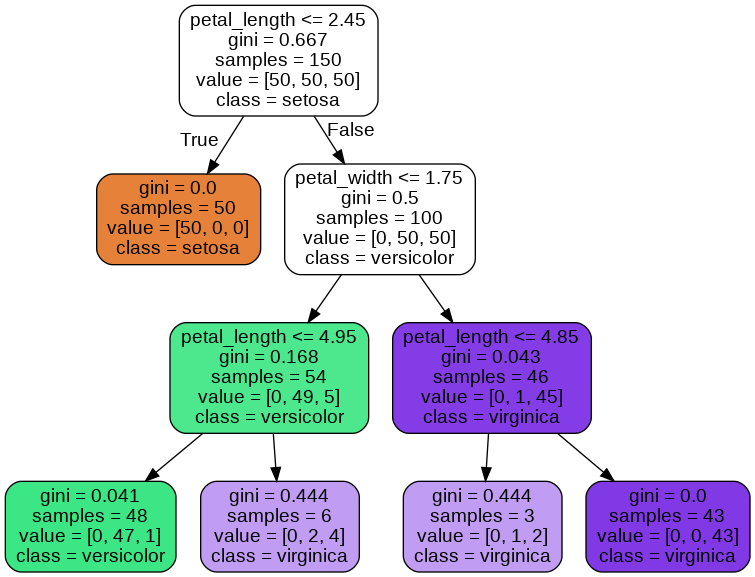

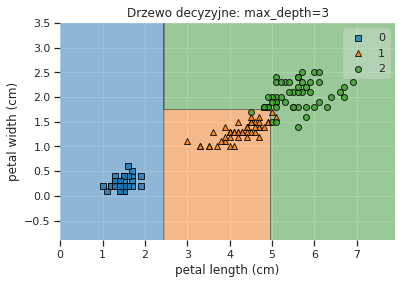

In [79]:
make_decision_tree(max_depth=3)

Dokładność modelu: 98.67%


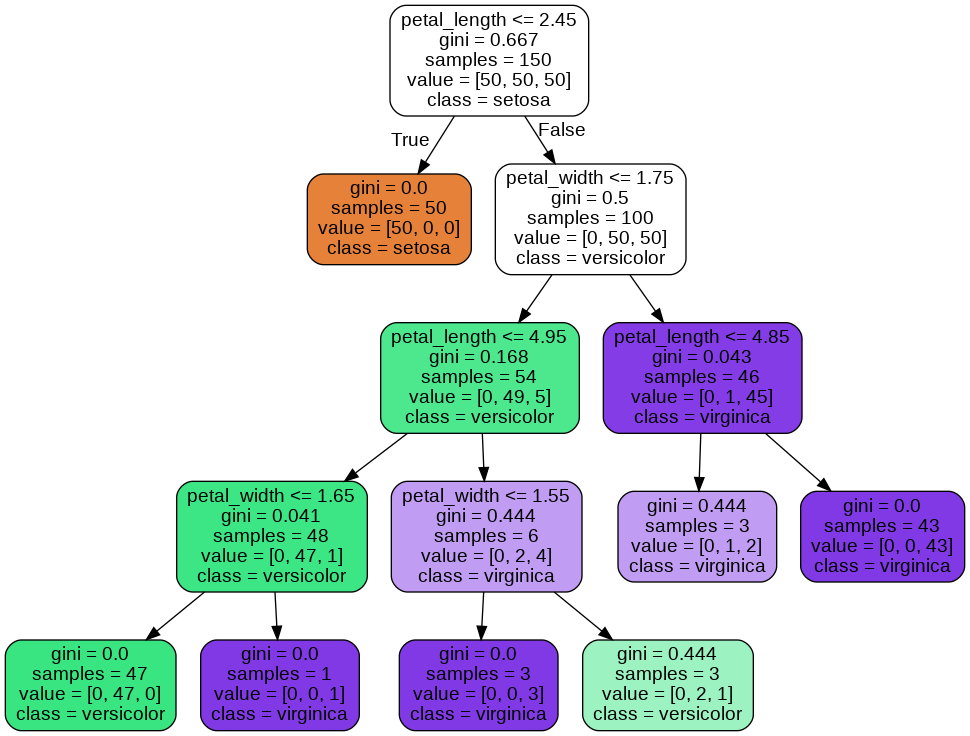

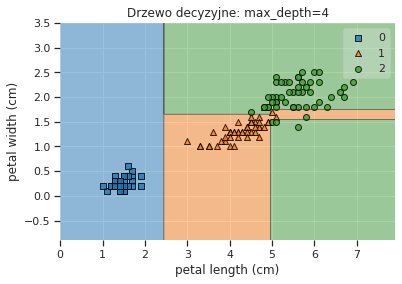

In [80]:
make_decision_tree(max_depth=4)

### Budowa klasyfikatora drzewa decyzyjnego - krytenium Gini

#### Gini dla korzenia (root) - poziom 0

In [81]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

#### Poziom 1, węzeł lewy

In [82]:
1 - (50 / 50)**2 - (0 / 50)**2 - (0 / 50)**2

0.0

#### Poziom 1, węzeł prawy

In [83]:
1 - (0 / 50)**2 - (50 / 100)**2 - (50 / 100)**2

0.5

#### Poziom 2, węzeł lewy

In [84]:
1 - (49 / 54)**2 - (5 / 54)**2

0.1680384087791495

#### Poziom 2, węzeł prawy

In [85]:
1 - (1 / 46)**2 - (45 / 46)**2

0.04253308128544431

### Budowa klasyfikatora drzewa decyzyjnego - krytenium Entropia

In [86]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=2')

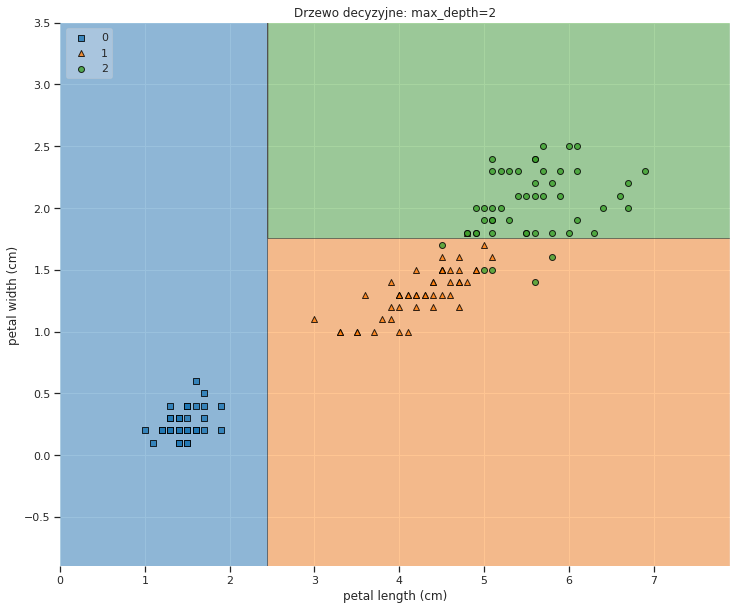

In [88]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=2')

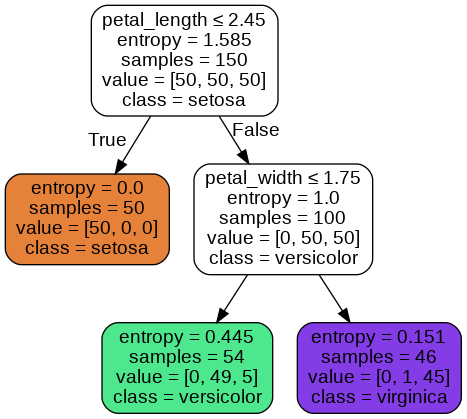

In [89]:
dot_data = StringIO()
export_graphviz(tree_clf, 
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

#### Entropia

In [93]:
# dla korzenia - poziom 0
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

In [95]:
# poziom 1, węzeł lewy
-((50 / 50) * np.log2(50 / 50))

-0.0

In [97]:
# poziom 1, węzeł prawy
-((50 / 100) * np.log2(50 / 100) + (50 / 100) * np.log2(50 / 100))

1.0